### Installing Packages Required

In [ ]:
# ! pip install tensorflow
# ! pip install Yfinance
# ! pip install streamlit matplotlib Numpy pandas

### Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [9]:
start = '2012-01-01'
end = '2023-12-31'
stock='SBIN.NS'
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [10]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,162.899994,163.600006,161.139999,162.764999,140.477142,14464990
2012-01-03,164.399994,171.000000,164.300003,170.565002,147.209076,21341020
2012-01-04,171.199997,171.389999,167.520004,169.604996,146.380554,22241630
2012-01-05,169.600006,171.854996,168.005005,169.244995,146.069824,21344840
2012-01-06,167.500000,170.759995,165.804993,167.274994,144.369553,21137420
...,...,...,...,...,...,...
2023-12-22,644.750000,649.400024,635.150024,636.750000,626.248047,14998068
2023-12-26,638.849976,641.299988,635.650024,638.049988,627.526550,10153089
2023-12-27,640.750000,649.450012,639.000000,648.549988,637.853394,14417646


In [11]:
data.reset_index(inplace=True)

In [12]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,162.899994,163.600006,161.139999,162.764999,140.477142,14464990
1,2012-01-03,164.399994,171.000000,164.300003,170.565002,147.209076,21341020
2,2012-01-04,171.199997,171.389999,167.520004,169.604996,146.380554,22241630
3,2012-01-05,169.600006,171.854996,168.005005,169.244995,146.069824,21344840
4,2012-01-06,167.500000,170.759995,165.804993,167.274994,144.369553,21137420
...,...,...,...,...,...,...,...
2953,2023-12-22,644.750000,649.400024,635.150024,636.750000,626.248047,14998068
2954,2023-12-26,638.849976,641.299988,635.650024,638.049988,627.526550,10153089
2955,2023-12-27,640.750000,649.450012,639.000000,648.549988,637.853394,14417646
2956,2023-12-28,650.250000,653.299988,646.500000,651.400024,640.656433,16982092


In [13]:
ma_100_days=data.Close.rolling(100).mean()

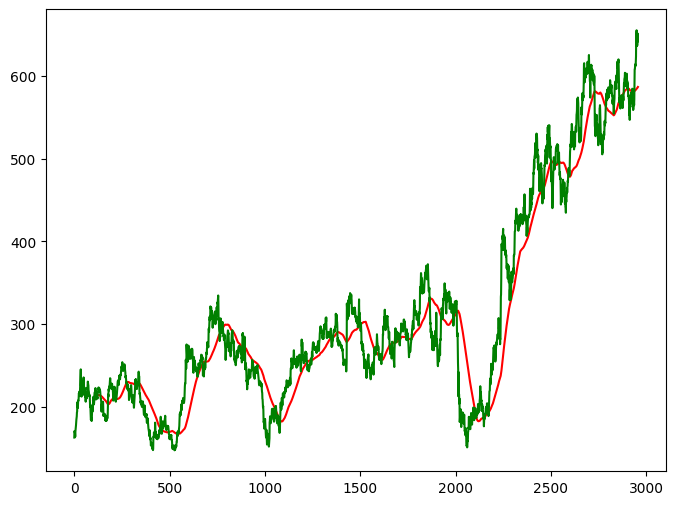

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [19]:
ma_200_days=data.Close.rolling(200).mean()

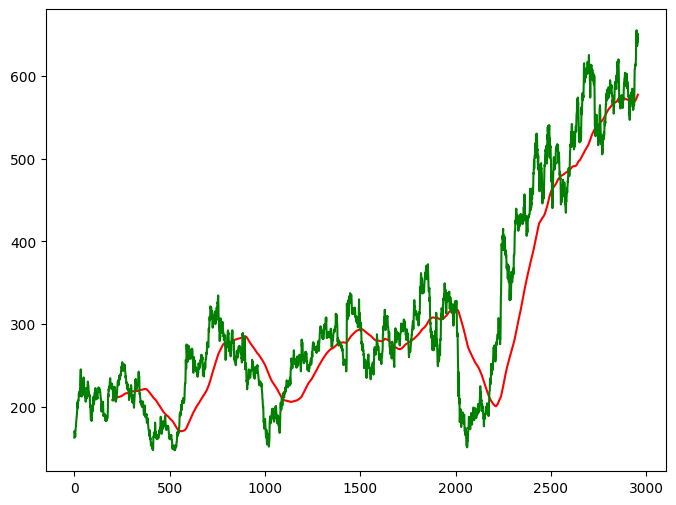

In [20]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(data.Close,'g')
plt.show()

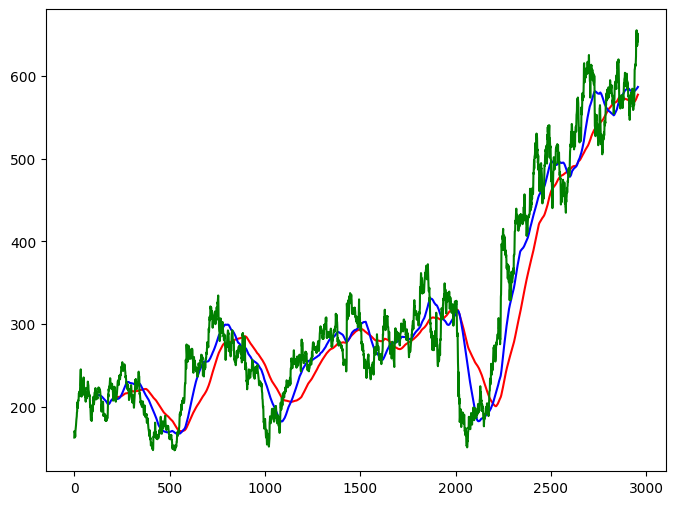

In [21]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [22]:
data.dropna(inplace=True)

In [27]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [31]:
data_train.shape

(2366, 1)

In [32]:
data_test.shape

(592, 1)

In [33]:
data.shape

(2958, 7)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [35]:
data_train_scale=scaler.fit_transform(data_train)

In [36]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [39]:
x,y=np.array(x),np.array(y)

In [37]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [40]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))  
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(units=1))

c:\Users\asus\Desktop\Python\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [42]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 0.0608
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0093
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0068
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0070
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0061
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0053
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0059
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0055
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0047
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0047
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0046
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0045
Epoch 13/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0042
Epoch 14/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0043
Epoch 15/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss:

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [45]:
past_100_days=data_train.tail(100)
data_test=pd.concat([past_100_days,data_test],ignore_index=True)

In [46]:
data_test

,Close
0,383.899994
1,378.549988
2,368.149994
3,367.100006
4,371.149994
...,...
687,636.750000
688,638.049988
689,648.549988
690,651.400024


In [47]:
data_test_scale=scaler.fit_transform(data_test)

In [50]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [51]:
y_predict=model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [55]:
scale=1/scaler.scale_

In [56]:
y_predict=y_predict*scale

In [57]:
y=y*scale

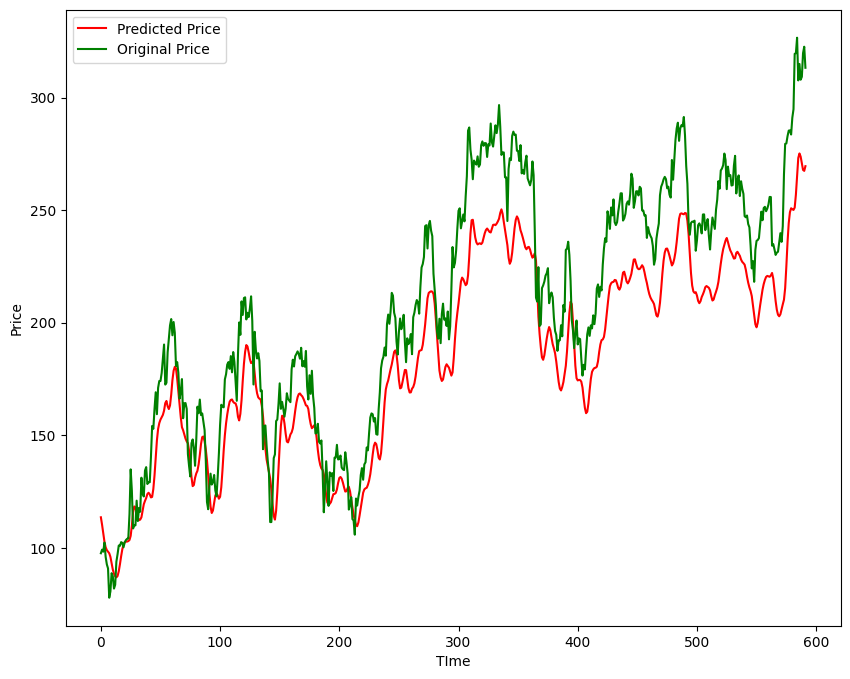

In [58]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('TIme')
plt.ylabel('Price')
plt.legend()
plt.show()

In [59]:
model.save("stock_prediction_model.keras")